In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.animation as animation 
import mpl_toolkits.mplot3d.axes3d as p3


In [2]:
acidities = pd.read_csv("./ass1_data/data/q1/linearX.csv")
densities = pd.read_csv("./ass1_data/data/q1/linearY.csv") 

In [3]:
def normalize(arr):
    mean = arr.mean()
    # print(mean) 
    # variance = acid_arr.var() 
    std_dev = arr.std()  
    arr = (arr - mean)/std_dev  
    return arr 

In [4]:

acid_arr = acidities["Acidities"].to_numpy()
acid_arr = normalize(acid_arr) 
# print(acid_arr) 

acidities["Intercept"] = 1 
cols = acidities.columns.to_list() 
cols = cols[1:] + cols[:1] 
acidities = acidities[cols]   
acidities["Acidities"] = acid_arr
# print(acidities) 

density_arr = densities["Densities"].to_numpy() 
density_arr = normalize(density_arr)
densities["Densities"] = density_arr 


In [5]:
def compute_error(theta, X, Y):
    Z = np.matmul(X, theta) - Y 
    m = Y.size
    return (np.matmul(np.transpose(Z), Z))/(2*m) 

In [6]:
def compute_gradient(theta , X, Y) : 
    Z = Y - np.matmul(X, theta) 
    # print(Z)
    gradient = np.zeros(theta.size)
    m = Y.size  
    for j in range(theta.size):
        X_j = X[:, j] 
        gradient[j] = np.sum(Z * X_j) / m  
    # gradient = np.sum( Z * X , axis = 0)
    # print(gradient)  
    return gradient 

In [7]:
dim = 2 
theta = np.zeros(dim) 
X = acidities.to_numpy()  
Y = density_arr 

learning_param = 0.1 

inv = np.linalg.inv(np.matmul(np.transpose(X), X)) 
actual_theta = np.matmul(np.matmul(inv, np.transpose(X)), Y) 

no_of_iterations = 0
# initial_error = compute_error(theta, X, Y) 
# error = initial_error 
# epsilon = 0.0000001 * initial_error 
# prev_error = 2*initial_error # some large value initially   

plot_data = [] 
current_grad = compute_gradient(theta, X, Y) 
epsilon = 0.001 * np.linalg.norm(current_grad) 
while (np.linalg.norm(current_grad) > epsilon):
       # prev_error = error 
       current_grad = compute_gradient(theta, X, Y )
       theta = theta + learning_param * current_grad 
       error = compute_error(theta, X,Y)  
       plot_data.append([theta[0], theta[1], error]) 
       print("error is", error)  
       # print("current theta is", theta ) 
       no_of_iterations += 1 

# print(plot_data)
print("gradient descent result is",theta)
print("actual theta is", actual_theta)  
print(f"no of iterations is {no_of_iterations}") 

error is 0.4592346067458747
error is 0.4262146382100332
error is 0.39946846369600153
error is 0.377804062339636
error is 0.3602558972409798
error is 0.3460418835110683
error is 0.33452853238984
error is 0.32520271798164513
error is 0.31764880831100717
error is 0.3115301414777905
error is 0.306574021342885
error is 0.3025595640336115
error is 0.2993078536131
error is 0.29667396817248565
error is 0.294540520965588
error is 0.292812428728001
error is 0.29141267401555554
error is 0.29027887269847463
error is 0.2893604936316391
error is 0.2886166065875024
error is 0.2880140580817516
error is 0.2875259937920935
error is 0.28713066171747037
error is 0.2868104427370257
error is 0.2865510653628655
error is 0.2863409696897958
error is 0.28617079219460917
error is 0.2860329484235081
error is 0.2859212949689163
error is 0.2858308556706968
error is 0.2857575998391392
error is 0.28569826261557746
error is 0.2856501994644923
error is 0.2856112683121135
error is 0.28557973407868664
error is 0.28555419

## plotting  the data

In [8]:
# plt.scatter(acid_arr, Y, label = "training set") 
# plt.title("Training set vs hypothesis function")

# H_theta = np.matmul(  acidities, theta ) 
# # label = "slope = " + str(theta[1]) + "\n intercept = " + str(theta[0]) 
# plt.plot(acid_arr, H_theta, label = "hypothesis function", color = "green") 

# plt.xlabel("X axis (normalized acidities)") 
# plt.ylabel("Y axis (normalized densities)" )

# plt.legend()
# plt.show()

## 3D mesh plot of error function

In [9]:
%matplotlib ipympl 

theta_x = np.arange(-0.5 , 0.5, 0.1 ) 
theta_y = np.arange(0,1 , 0.1) 
X_mesh, Y_mesh = np.meshgrid(theta_x, theta_y) 
# print(X_mesh) 
# print(Y_mesh)
X_row, X_col = X_mesh.shape
Y_row, Y_col = Y_mesh.shape 

error_surface = np.zeros((X_row, X_col))  
# print(X) 

for i in range(X_row):
    for j in range(X_col):
        x_coord = X_mesh[i,j] 
        y_coord = Y_mesh[i,j] 
        temp_theta = np.array([x_coord, y_coord])   
        error_surface[i,j] = compute_error(temp_theta, X, Y)


# fig = plt.figure(dpi=150)


In [10]:


# ax = fig.add_subplot(111, projection='3d')
# sc = ax.scatter([], [], [], c='b', marker='.', s = 8, alpha=0.7)

# ax.set(xlim3d=(0, 0.5), xlabel='Theta 0')
# ax.set(ylim3d=(0, 1), ylabel='Theta 1')
# ax.set(zlim3d=(0.2, 0.8), zlabel='Z')

# ax.plot_surface(X_mesh, Y_mesh, error_surface, alpha = 0.4)   


# # Initialization function
# def init():
#     sc._offsets3d = ([], [], [])
#     return sc, 

# # Animation function
# def update(frame):
#     # if (frame % 5 == 0):
#     x, y, z = zip(*plot_data[:frame+1])
#     sc._offsets3d = (x, y, z)

#     if frame > 0:
#         prev_x, prev_y, prev_z = plot_data[frame-1]
#         arrow_x = x[-1] - prev_x
#         arrow_y = y[-1] - prev_y
#         arrow_z = z[-1] - prev_z
#         ax.quiver(prev_x, prev_y, prev_z, arrow_x, arrow_y, arrow_z, color='red', linewidth = 0.5 )

#     return sc,

# azim_angle = 11 # Adjust the azimuth angle (horizontal rotation)
# elev_angle = 16  # Adjust the elevation angle (vertical rotation)
# ax.view_init(elev=elev_angle, azim=azim_angle)


# # Create the animation
# frame_interval = 200 
# ani = animation.FuncAnimation(fig, update, frames=len(plot_data), init_func=init, blit=True, interval = 
#                               frame_interval)
# ani.save("1_c_animation.png", writer='imagemagick', dpi = 300) 
# # Display the animation
# plt.show()

## Plotting Contours

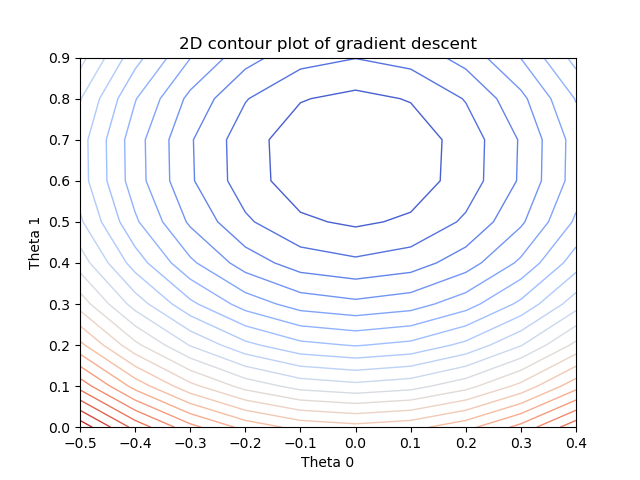

In [21]:
fig, ax2d = plt.subplots() 
plot_data = np.array(plot_data)
contour_data = plot_data[:, 0:2 ] 
# print(contour_data)

# contour_data = [ (0,0.1), (0,0.2), (0, 0.3), (0,0.4)]

contour = ax2d.contour(X_mesh, Y_mesh, error_surface, levels=25, cmap='coolwarm', linewidths=1)
ax2d.set_xlabel('Theta 0')
ax2d.set_ylabel('Theta 1') 
ax2d.set_title("2D contour plot of gradient descent") 
ax2d.set(xlim = (-0.5, 0.4), xlabel='Theta 0')
ax2d.set(ylim =(0, 0.9), ylabel='Theta 1')

sc = ax2d.scatter([], [], color='red', marker='*' ) 

def update_contour_plot(frame):
    sc.set_offsets([contour_data[frame]])
    # sc = ax2d.scatter(zip(*contour_data[:frame + 1]), color='red', marker='o')
    return sc

# contour = ax2d.contour(X_mesh, Y_mesh, error_surface, levels=25 , cmap='coolwarm', linewidths=1)
# ax2d.set_xlabel('Theta 0')
# ax2d.set_ylabel('Theta 1') 
# ax2d.set_title("2D contour plot of gradient descent") 
# ax2d.set(xlim = (-0.5 , 0.4), xlabel='Theta 0')
# ax2d.set(ylim =(0, 0.9), ylabel='Theta 1')



ani = animation.FuncAnimation(fig, update_contour_plot, frames=len(contour_data), interval= 200)
# plt.tight_layout()
plt.show()